In [1]:
import os
import numpy
import patchify
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rio
from matplotlib import pyplot as plt
import patchify

In [2]:
!pwd

/home/shaun/PHYS_391B


In [3]:
data_base = '/home/shaun/data/raw/new_data_tiff'
merged_base = r'/home/shaun/data/merged'
shape = os.path.join(merged_base, 'outlines/nz-building-outlines.shp')
shape

'/home/shaun/data/merged/outlines/nz-building-outlines.shp'

In [11]:
# now we can load the data into geopandas dataframes:
gdf_sh = gpd.read_file(shape)
gdf_sh.geometry

0       POLYGON ((1550565.639 5173146.668, 1550567.924...
1       POLYGON ((1549106.212 5173325.232, 1549109.172...
2       POLYGON ((1550623.201 5173495.325, 1550624.395...
3       POLYGON ((1549893.856 5173298.421, 1549899.303...
4       POLYGON ((1549822.240 5173248.087, 1549827.751...
                              ...                        
7841    POLYGON ((1549821.496 5172056.596, 1549818.412...
7842    POLYGON ((1549902.876 5172133.808, 1549901.419...
7843    POLYGON ((1549955.499 5171996.433, 1549950.564...
7844    POLYGON ((1549751.196 5172084.532, 1549752.790...
7845    POLYGON ((1549539.752 5172044.329, 1549540.372...
Name: geometry, Length: 7846, dtype: geometry

The next cell is a matplotlib implementation, which I think would work for conversion, but I will next try to use:\
Gdal terminal command: `https://gdal.org/programs/gdal_rasterize.html#example`

In [14]:
# RGB color of white is: (255,255,255)
# The below command should burn all polygons from mask.shp into the RGB TIFF file work.tif with the color white (RGB = 255,255,255).
# The below command works!!
# command = f"gdal_rasterize -burn 255 -burn 255 -burn 255 -ot Byte -ts 22955 18926 /home/shaun/data/merged/outlines/nz-building-outlines.shp /home/shaun/data/merged/outlines/mask.tif" 
# print(os.popen(command).read())

0...10...20...30...40...50...60...70...80...90...100 - done.



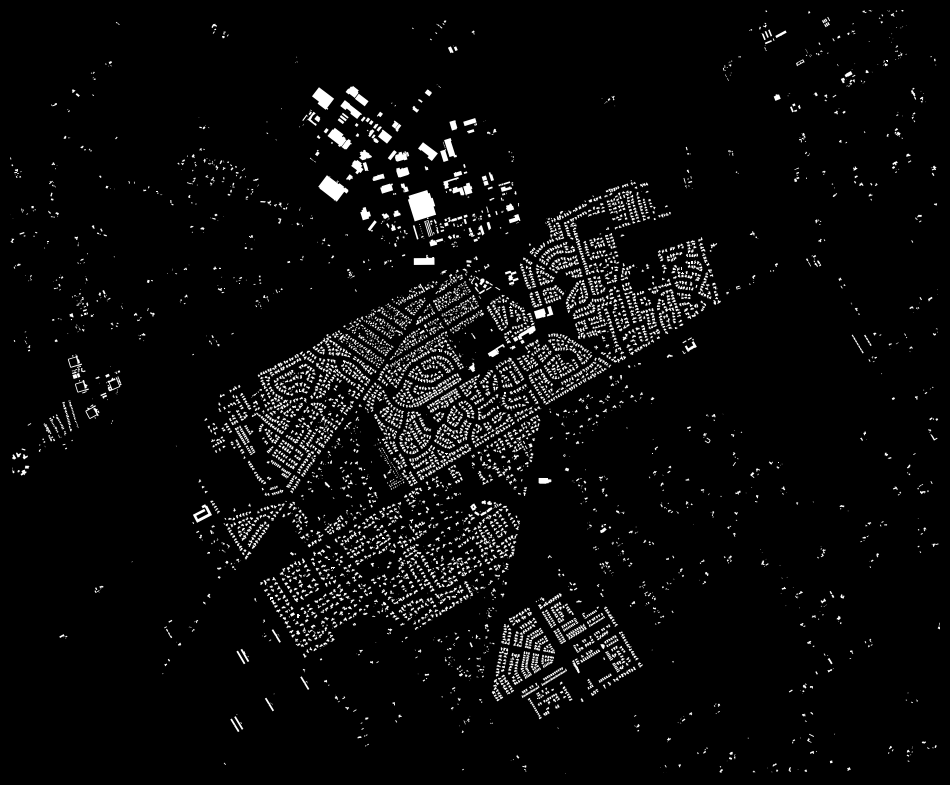

In [22]:
# quick look to see if it is there:
# I think I can get away with just using matplotlib to convert this to jpeg

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# out_shape = (19879, 24579)
# fig, ax = plt.subplots(figsize=(2.4579, 1.9879), frameon=False, dpi=1000)
# fig.patch.set_facecolor('black')
# gdf_sh.plot(ax=ax, figsize=(20,18), facecolor="None", color='white', aspect='auto')
# plt.axis('off')
# # %config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
# fig = plt.gcf()
# DPI = fig.get_dpi()
# fig.set_size_inches(24579.0/float(DPI),19879.0/float(DPI))
# plt.gca().set_position([0, 0, 1, 1])
# plt.axis('tight')

# plt.savefig(savedir + '\\rolleston_mask2.tif', dpi=1000)


fig, ax = plt.subplots(figsize=(12,12))
gdf_sh.plot(ax=ax, color='white')
fig.patch.set_facecolor('black')
plt.axis('off')
plt.show()

In [6]:
# when using patchify, it uses patches = patchify(image, (x,y), step=z), where I want to use x=y=z=512.
# I also need to first make a merged mosaic tile of the tiff files, most easily done using gdal
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from osgeo import gdal

In [7]:
files_to_mosaic = glob.glob(os.path.join(data_base, r'2015_2016') + '/*.tif')
files_to_mosaic

['/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0504.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0605.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0606.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0603.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0503.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0506.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0505.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0604.tif']

In [8]:
files_string = " ".join(files_to_mosaic)
files_string

'/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0504.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0605.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0606.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0603.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0503.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0506.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0505.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0604.tif'

In [9]:
# This may just be the ugliest function call I have seen in my life, but it works:
# https://gdal.org/programs/gdal_merge.html for docs.

# The below command worked like a charm, but is commented out so I don't accidentally run it again. It just takes forever.
# command = "gdal_merge.py -o /home/shaun/data/merged/2015_2016/2015_2016_mosaic.tif -of gtiff " + files_string
# print(os.popen(command).read())

In [12]:
# I will attempt to try this next: https://gis.stackexchange.com/questions/354782/masking-netcdf-time-series-data-from-shapefile-using-python/354798#354798

In [13]:
import cv2 as cv

Now to split up the merged mask tif and the merged 2015-2016 mosaic into respective patches.
- File structure will be data/merged/2015_2016/tiles and data/merged/outlines/tiles for satellite data and mask respectively.

In [40]:
satellite_mosaic = r'/home/shaun/data/merged/2015_2016/2015_2016_mosaic.tif'
mask_mosaic = r'/home/shaun/data/merged/outlines/mask.tif'

data_out = r'/home/shaun/data/merged/2015_2016/tiles/'
mask_out = r'/home/shaun/data/merged/outlines/tiles/'

In [23]:
# Let us test if we can open the image with opencv2:
import cv2
img = cv2.imread(satellite_mosaic)
img.shape

mask = cv2.imread(mask_mosaic)
mask.shape

(18926, 22955, 3)

In [41]:
# Below is code I found from https://stackoverflow.com/questions/68224588/problem-when-using-patchify-library-to-create-patches
# This describes how to split up the tile into 224*224 tiles.

def make_patches(im, fp_out, name):
    """ Generate patches from inputted tiff. I will add an arg for bands too.
        Note: This code is specifically for .tif images with 3 bands.

    Args:
        im (filepath): path to target image.
        fp_out (filepath): path to output folder.
        name (string): name contained in outputted files.

    Raises:
        Exception: _description_
    """
    img = cv2.imread(im)
    patches_img = patchify.patchify(img, (224,224,3), step=224)

    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i, j, 0, :, :, :]
            if not cv2.imwrite(fp_out + f'{name}_' + '_'+ str(i)+str(j)+'.jpg', single_patch_img):
                raise Exception("Could not write the image")

In [42]:
make_patches(satellite_mosaic, data_out, '2015_2016')
make_patches(mask_mosaic, mask_out, '2015_2016')
# Woohoo it worked!

In [32]:
os.path.join(mask_out,'sat_2015_2016__79.jpg')

'/home/shaun/data/merged/outlines/tiles/sat_2015_2016__79.jpg'

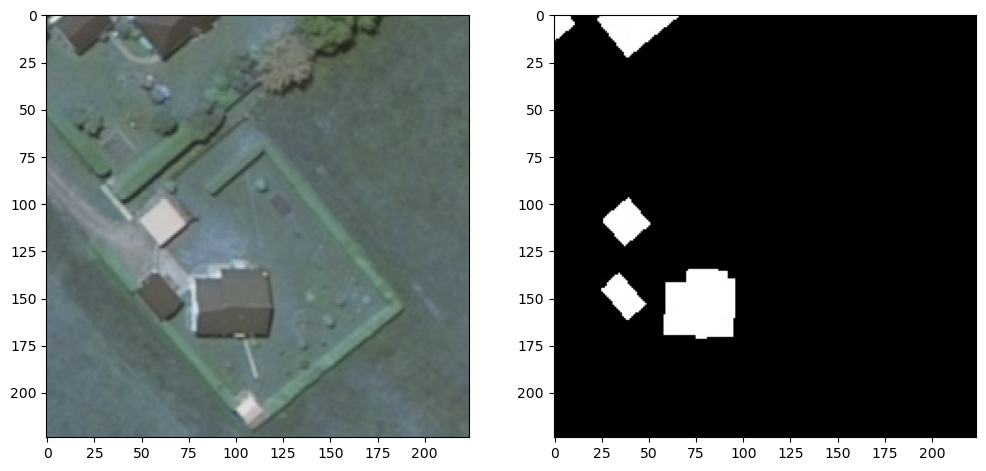

In [43]:
# now let us do a quick and dirty plot to see if it worked well:
fig, ax = plt.subplots(1,2, figsize=(12,6))

data = cv2.imread(os.path.join(data_out,'2015_2016__79.jpg'))
mask = cv2.imread(os.path.join(mask_out,'2015_2016__79.jpg'))

# data

ax[0].imshow(data)
ax[1].imshow(mask)
plt.show()

In [44]:
data.shape, mask.shape

((224, 224, 3), (224, 224, 3))

In [45]:
test = cv2.imread(r'/home/shaun/data/merged/2015_2016/tiles/2015_2016__1178.jpg')
test.shape

(224, 224, 3)